Q1 : Write a program/function to do the ”Full scale contrast stretch (FSCS)”. Verify your result by printing the min and max pixel values before and after applying FSCS. Also, plot the histogram of the image before and after applying FSCS

Min pixel value before FSCS:  32
Max pixel value before FSCS:  246
Min pixel value after FSCS:  0
Max pixel value after FSCS:  1


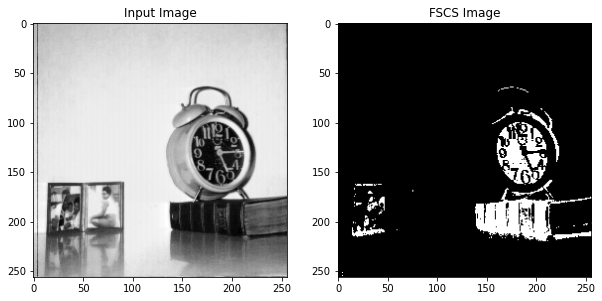

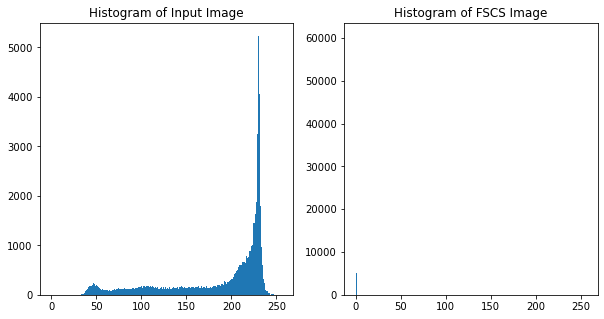

In [4]:
import numpy as np
from matplotlib import pyplot as plt

img = plt.imread(r'C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\5.1.12.tiff')

min_val = np.min(img)
max_val = np.max(img)
print("Min pixel value before FSCS: ", min_val)
print("Max pixel value before FSCS: ", max_val)

fscs_img = (255*(img - min_val))/(max_val - min_val)
fscs_img = np.uint8(fscs_img)

fscs_min_val = np.min(fscs_img)
fscs_max_val = np.max(fscs_img)
print("Min pixel value after FSCS: ", fscs_min_val)
print("Max pixel value after FSCS: ", fscs_max_val)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Input Image')
axs[1].imshow(fscs_img, cmap='gray')
axs[1].set_title('FSCS Image')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(img.ravel(), 256, [0, 256])
axs[0].set_title('Histogram of Input Image')
axs[1].hist(fscs_img.ravel(), 256, [0, 256])
axs[1].set_title('Histogram of FSCS Image')

plt.show()


 Q2. Imagine you have an image taken in low light levels and which, as a result, has low contrast.What are the advantages of using contrast stretching to improve the contrast, rather than simply scaling the image by a factor of, say, three? 

Advantages of Contrast stretching over scaling by a factor.

1.It retains the details in the image and enhances the features, making them more visible. Scaling the image by a factor of three may cause some loss of detail or introduce artifacts.

2.Increases the dynamic range of the image, allowing for a wider range of values to be displayed.Scaling the image by a factor of three does not increase the dynamic range of the image.

3.It preserves the original data and does not introduce any new information. Whereas scaling the image by a factor of three introduces new data that was not present in the original image.

 Q3. Write a program to perform histogram equalization. Plot the histogram of the image before and after applying histogram equalization.

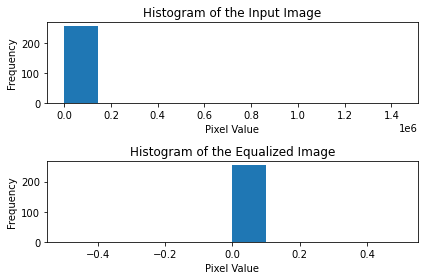

In [5]:
import numpy as np
from matplotlib import pyplot as plt

img = plt.imread(r'C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\hist_equalization2.png')

hist, bins = np.histogram(img.flatten(), 256, [0, 256])

cdf = hist.cumsum()

cdf_normalized = cdf * hist.max() / cdf.max()

img_equalized = np.interp(img.flatten(), bins[:-1], cdf_normalized)

img_equalized = img_equalized.reshape(img.shape)

hist_eq, bins_eq = np.histogram(img_equalized.flatten(), 256, [0, 256])

plt.subplot(2, 1, 1)
plt.hist(hist)
plt.title('Histogram of the Input Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.hist(hist_eq)
plt.title('Histogram of the Equalized Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




Q4 Write a function, which takes an input image and a reference image and applies histogram Matching on the input image by matching the histogram with that of the reference image. Use eye.png and eyeref.png (converted to grayscale) as the input and reference images respectively

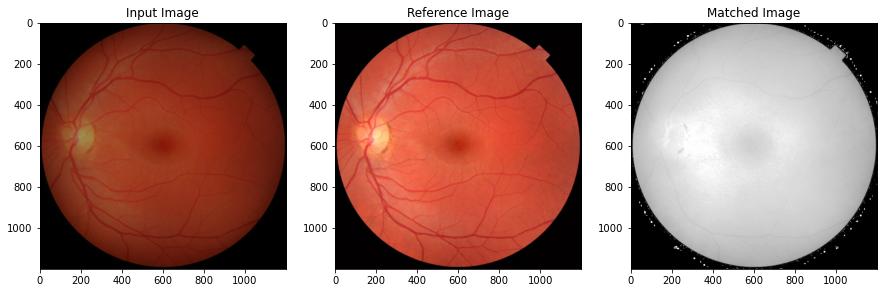

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


input_img = Image.open(r'C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\eye.png')
ref_img = Image.open(r'C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\eyeref.png')

img = np.array(input_img)
img = img[:,:,0]
ref_arr = np.array(ref_img)
ref_arr = ref_arr[:,:,0]

input_hist, _ = np.histogram(img.flatten(), 256, [0,256])
ref_hist, _ = np.histogram(ref_arr.flatten(), 256, [0,256])
input_cdf = np.cumsum(input_hist) / float(np.sum(input_hist))
ref_cdf = np.cumsum(ref_hist) / float(np.sum(ref_hist))
mapping = np.zeros(256)
for i in range(256):
    j = 255
    while ref_cdf[j] > input_cdf[i] and j >= 0:
        j -= 1
    mapping[i] = j
matched_arr = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        matched_arr[i,j] = mapping[img[i,j]]

matched_img = Image.fromarray(matched_arr)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(input_img)
axs[0].set_title('Input Image')
axs[1].imshow(ref_img)
axs[1].set_title('Reference Image')
axs[2].imshow(matched_img, cmap='gray')
axs[2].set_title('Matched Image')
plt.show()


2D-DFT:- Recall the definition of the 2D-DFT from class. Assume that you are working with
square images. Write a program, that implements the DFT/IDFT pair using the following
techniques.
1. From first principles i.e., as a summation over two dimensions. (5)
Now do the following using three of your favorite images from the above set:
2. Display the image, its DFT magnitude, phase, DFT magnitude subject to the logarithmic
transformation. (3)
3. Verify that IDFT[DFT[I]] = I. (3)
4. Show the importance of phase by transposing the phase matrix and then synthesizing the
image. Repeat by a) setting the phase to 0, and b) by adding noise. (3)

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def DFT2D(image):
    M, N = image.shape
    dft = np.zeros((M, N), dtype=np.complex128)
    for u in range(M):
        for v in range(N):
            for x in range(M):
                for y in range(N):
                    dft[u, v] += image[x, y] * np.exp(-2j * np.pi * (u*x/M + v*y/N))
    return dft / np.sqrt(M*N)

def IDFT2D(dft):
    M, N = dft.shape
    image = np.zeros((M, N), dtype=np.float64)
    for x in range(M):
        for y in range(N):
            for u in range(M):
                for v in range(N):
                    image[x, y] += dft[u, v] * np.exp(2j * np.pi * (u*x/M + v*y/N))
            image[x, y] /= M*N
    return image

image1 = plt.imread(r'C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\5.1.09.tiff')
image2 = plt.imread(r'C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\5.1.10.tiff')
image3 = plt.imread(r'C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\5.1.11.tiff')

dft1 = DFT2D(image1)
dft2 = DFT2D(image2)
dft3 = DFT2D(image3)

mag1 = np.abs(dft1)
mag2 = np.abs(dft2)
mag3 = np.abs(dft3)
phase1 = np.angle(dft1)
phase2 = np.angle(dft2)
phase3 = np.angle(dft3)

log_mag1 = np.log10(mag1 + 1)
log_mag2 = np.log10(mag2 + 1)
log_mag3 = np.log10(mag3 + 1)

fig, axs = plt.subplots(3, 4, figsize=(12, 12))

axs[0, 0].imshow(image1, cmap='gray')
axs[0, 0].set_title('Image 1')
axs[0, 1].imshow(mag1, cmap='gray')
axs[0, 1].set_title('DFT Magnitude 1')
axs[0, 2].imshow(phase1, cmap='gray')
axs[0, 2].set_title('DFT Phase 1')
axs[0, 3].imshow(log_mag1, cmap='gray')
axs[0, 3].set_title('Log DFT Magnitude 1')

axs[1, 0].imshow(image2, cmap='gray')
axs[1, 0].set_title('Image 2')
axs[1, 1].imshow(mag2, cmap='gray')
axs[1, 1].set_title('DFT Magnitude 2')
axs[1, 2].imshow(phase2, cmap='gray')
axs[1, 2].set_title('DFT Phase 2')

plt.show()

KeyboardInterrupt: 